In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette('Paired')
%matplotlib inline

# Load and Check NaN 

### Read Files

In [85]:
df = pd.read_csv("/content/sample_data/exams.csv")

### Check null

In [86]:

df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Print datatypes

In [87]:

df.dtypes


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Print Values

In [88]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

gender: ['male' 'female']

race/ethnicity: ['group A' 'group D' 'group E' 'group B' 'group C']

parental level of education: ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]

lunch: ['standard' 'free/reduced']

test preparation course: ['completed' 'none']

math score: [ 67  40  59  77  78  63  62  93  47  99  80  74  81  69  58  54  23  39
  83  71  44  46  51  53  33  87  65  79  68  57  98 100  60  64  52  36
  56  88  42  76  49  72  31  32  97  94  95  45  75  66  70  82  92  30
  41  43  55  73  48  86  84  50  89  91  85  61  35  90  96  13  38  28
  26  37  29  34  25]

reading score: [ 67  59  60  78  73  77  88  56  42  83  87  74  61  47  62  44  32  76
  52  69  55  38  45  68  89  54  79  41  65  81  75  70  46  63  72  58
  53  57  80  51  66  82  93  64  91  43  71 100  50  33  34  90  84  95
  98  92  85  49  86  48  94  36  28  39  29  96  97  40  27  37  99  31
  35]

writing score: [ 63  55  50  68  76  84 

###Rename columns name
   

In [89]:

df = df.rename(columns={   
    "race/ethnicity":"race",
    "parental level of education":"level",
    "test preparation course":"is_prepared",
    "math score":"math",
    "reading score":"reading",
    "writing score":"writing"
})

## Distribution of categories

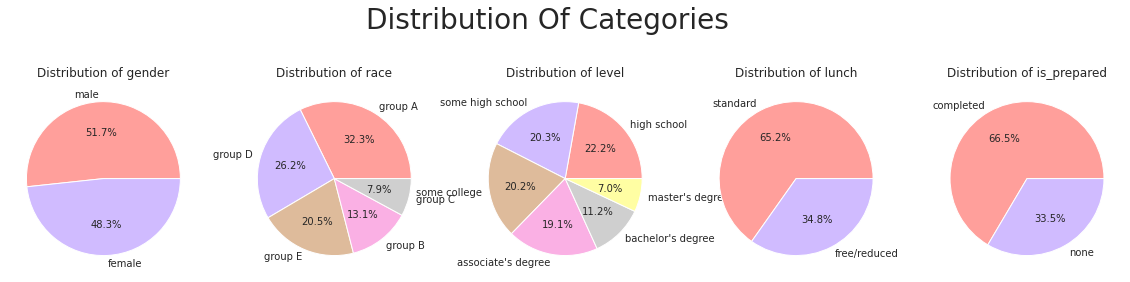

In [90]:
fig, axs= plt.subplots(ncols=5, figsize=(20,5))
categories = ['gender', 'race','level','lunch','is_prepared']


for i in range(len(categories)):
  data = df[categories[i]].value_counts(normalize=True).tolist()
  labels = df[categories[i]].unique().tolist()
  colors = sns.color_palette('pastel')[3:9]
  axs[i].pie(x=data, labels =labels,colors=colors, autopct='%1.1f%%')
  axs[i].set_title(f"Distribution of {categories[i]}")

fig.suptitle("Distribution Of Categories", fontsize=28)
plt.show()

### Distribution of Scores

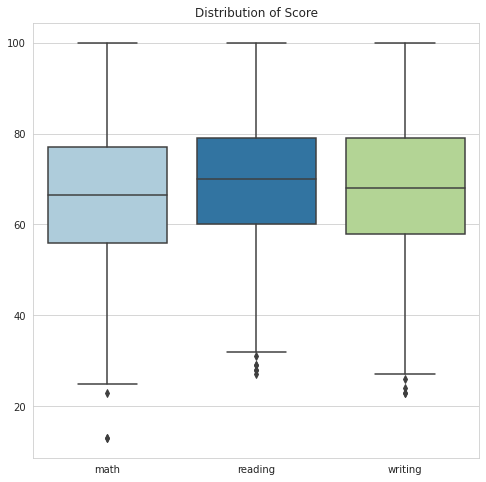

In [91]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df[['math','reading','writing']], orient="v").set(title = "Distribution of Score")
plt.show()

Mean & Median

MATH
 Mean: 66.396	Median:66.5

READING
 Mean: 69.002	Median:70.0

WRITING
 Mean: 67.738	Median:68.0



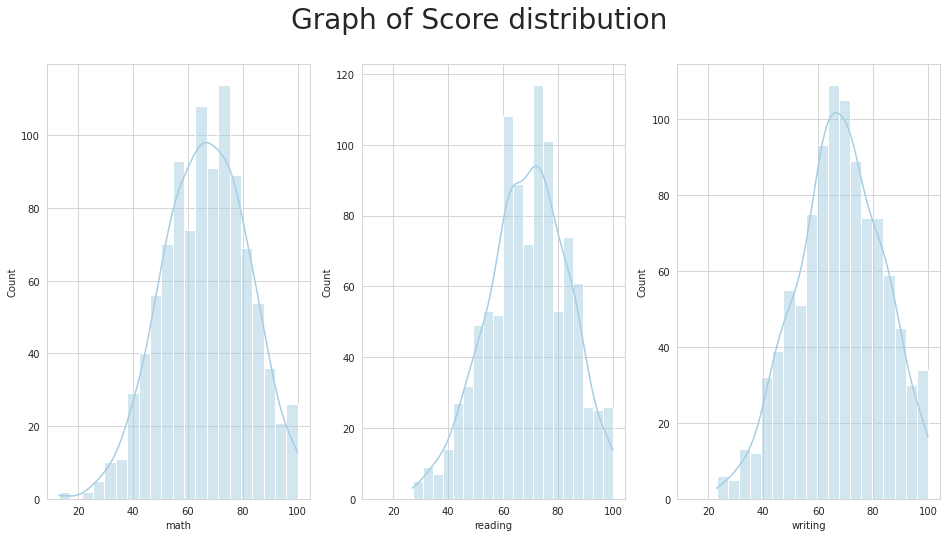

In [92]:

subjects = ['math','reading','writing']
mean_score = df[subjects].mean()
median_score = df[subjects].median()
for i in range(3):
  print(f"{subjects[i].upper()}\n Mean: {mean_score[i]}\tMedian:{median_score[i]}\n")

fig, score_axes = plt.subplots(ncols = 3, sharex=True, figsize=(16,8))
for i in range(3):
  sns.histplot(data = df, x=subjects[i], kde=True, ax=score_axes[i])
fig.suptitle('Graph of Score distribution', fontsize=28)
plt.show()

# Correlations of scores on categories

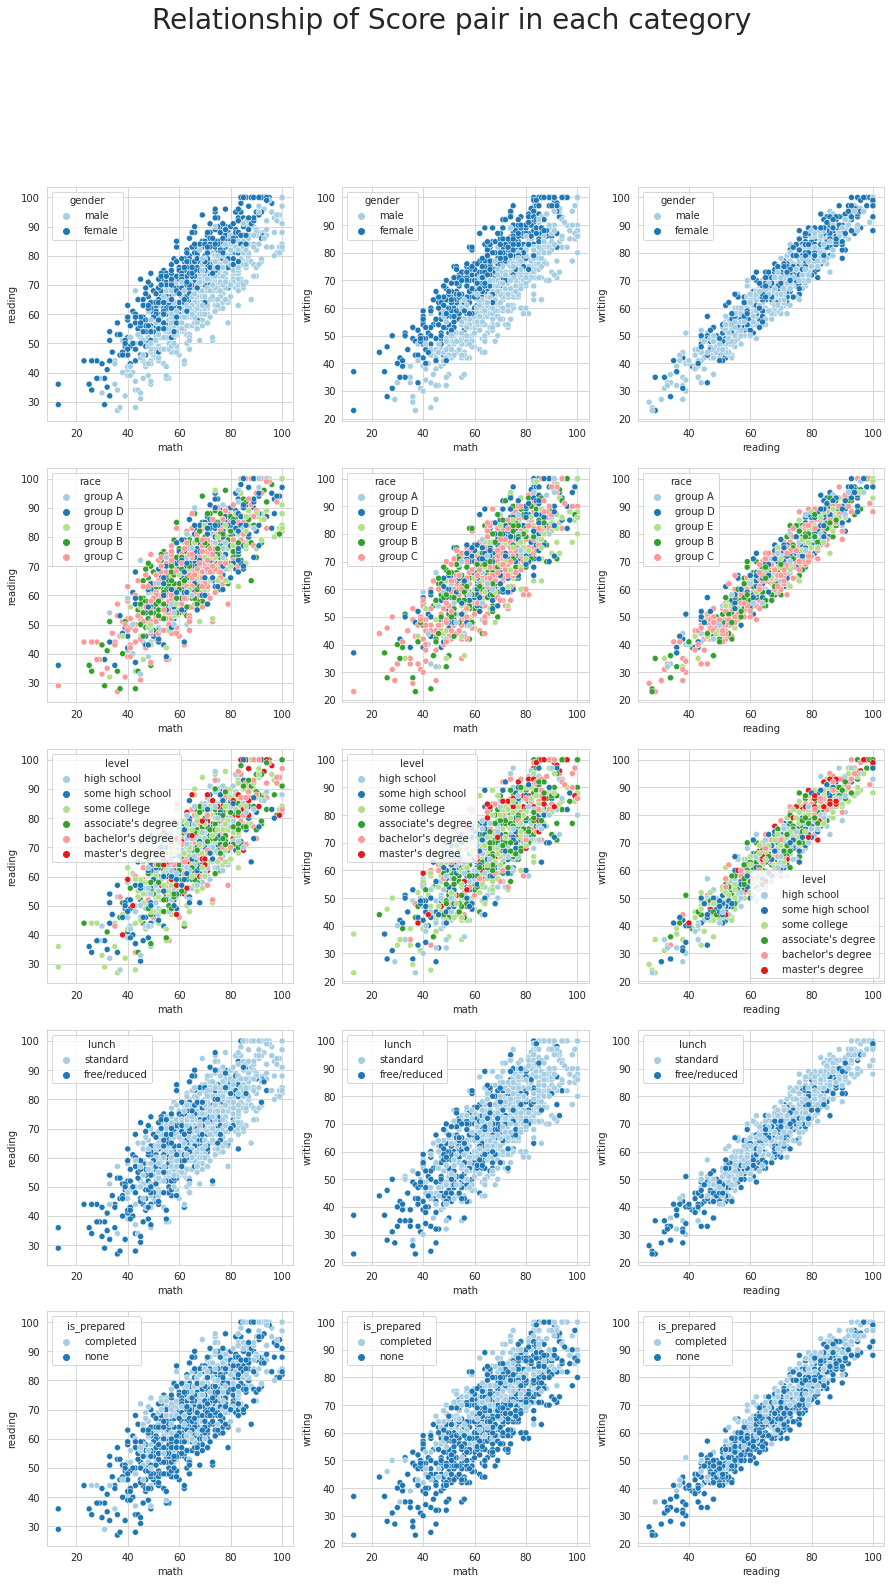

In [93]:
pairs = [
        [subjects[0],subjects[1]], 
        [subjects[0],subjects[2]], 
        [subjects[1],subjects[2]], 
         ]

fix, ax = plt.subplots(figsize=(15,25), nrows=5, ncols=3)
for i,p in enumerate(pairs):
    for j,hue in enumerate(categories):
        sns.scatterplot(data=df, x=p[0], y=p[1], hue=hue, ax=ax[j,i])
fix.suptitle("Relationship of Score pair in each category", fontsize=28)
plt.show()

# comparison between category and score


In [94]:
def compare_groups(variable):
  df.groupby(variable).mean().T.plot(kind='bar', figsize=(10,4))
  plt.title(f"Mean score of each subject of {variable.upper()}")
  plt.show()


###  gender 

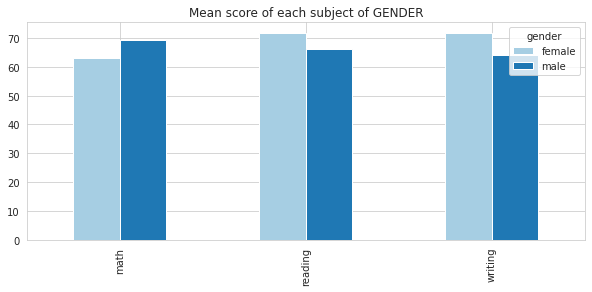

In [95]:
compare_groups('gender')

###  race 

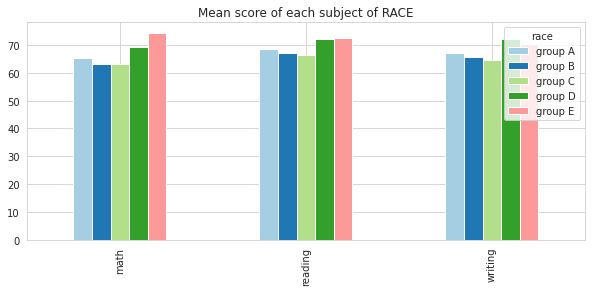

In [96]:
compare_groups('race')

###  parent level 

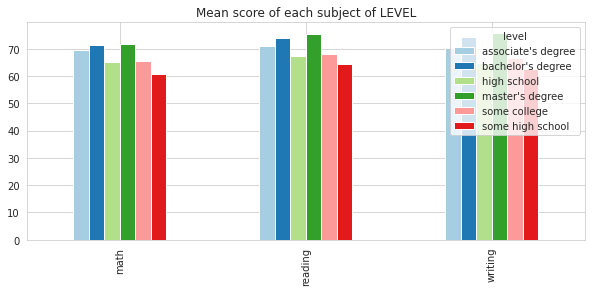

In [97]:
compare_groups('level')

### lunch 

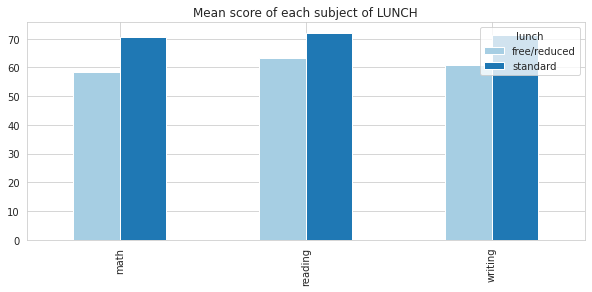

In [98]:
compare_groups('lunch')

###  Test Preparation 

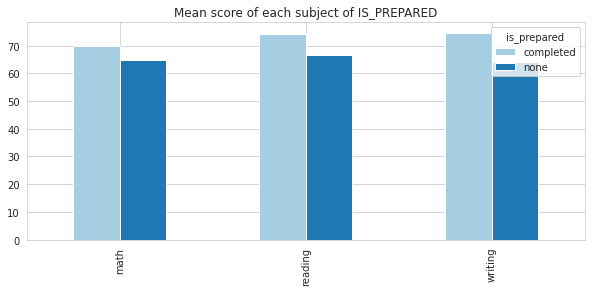

In [99]:
compare_groups('is_prepared')

In [100]:
d1=["math","reading","writing"]
X=df.drop(d1,axis = 1)
print(X)

     gender     race               level         lunch is_prepared
0      male  group A         high school      standard   completed
1    female  group D    some high school  free/reduced        none
2      male  group E        some college  free/reduced        none
3      male  group B         high school      standard        none
4      male  group E  associate's degree      standard   completed
..      ...      ...                 ...           ...         ...
995    male  group C         high school      standard        none
996    male  group D  associate's degree  free/reduced   completed
997  female  group C    some high school  free/reduced        none
998  female  group C        some college      standard        none
999    male  group A        some college      standard   completed

[1000 rows x 5 columns]


In [101]:
y=df.drop(X,axis=1)
y

,math,reading,writing
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [102]:
X=pd.get_dummies(X)
X

,gender_female,gender_male,race_group A,race_group B,race_group C,race_group D,race_group E,level_associate's degree,level_bachelor's degree,level_high school,level_master's degree,level_some college,level_some high school,lunch_free/reduced,lunch_standard,is_prepared_completed,is_prepared_none
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
996,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
997,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
998,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df.head()

,gender,race,level,lunch,is_prepared,math,reading,writing
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


#Modeling and prediction

Model 1

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
rf = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500, random_state=100)

In [105]:
predict = rf.predict(X_val)


In [106]:
print(predict)

[2.    0.    1.998 0.    1.958 2.    0.    0.    2.    0.    0.    1.998
 0.    0.    2.    1.    1.014 1.998 2.    2.    1.992 0.    1.99  0.
 1.    1.941 1.    0.    1.    1.998]


In [114]:
dif = pd.DataFrame({'value': y_val, 'Predicted value': predict})
dif.head(10)

,value,Predicted value
0,2,2.000
1,0,0.000
2,2,1.998
3,0,0.000
4,2,1.958
5,2,2.000
6,0,0.000
7,0,0.000
8,2,2.000
9,0,0.000


In [115]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_val, predict), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val, predict), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val, predict), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val, predict), 2)) 
print("R2 score =", round(sm.r2_score(y_val, predict), 2))

Mean absolute error = 0.04
Mean squared error = 0.03
Median absolute error = 0.0
Explain variance score = 0.96
R2 score = 0.96


Model 2

In [109]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [110]:
predict_sec = lin.predict(X_val)

In [111]:
print(predict_sec)

[ 1.89813505 -0.00357688  2.1994565  -0.05190652  1.57889494  1.99427711
 -0.16229612 -0.0358974   1.67973064  0.03181952 -0.03834573  1.92348347
  0.0940074  -0.08703394  1.88366724  1.14888749  0.96444884  1.48853257
  1.96771073  1.82610705  1.71613799  0.03335408  1.6713279   0.0172602
  1.02068714  1.64528997  1.18640887 -0.03754746  1.19699771  1.96738653]


In [117]:
mlr_diff = pd.DataFrame({'Actual ': y_val, 'Predicted value': predict_sec})
mlr_diff.head(10)

,Actual,Predicted value
0,2,1.898135
1,0,-0.003577
2,2,2.199457
3,0,-0.051907
4,2,1.578895
5,2,1.994277
6,0,-0.162296
7,0,-0.035897
8,2,1.679731
9,0,0.031820


In [118]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_val, predict_sec), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val, predict_sec), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val, predict_sec), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val, predict_sec), 2)) 
print("R2 score =", round(sm.r2_score(y_val, predict_sec), 2))

Mean absolute error = 0.14
Mean squared error = 0.04
Median absolute error = 0.09
Explain variance score = 0.96
R2 score = 0.95
